<a href="https://colab.research.google.com/github/SakshatVacche/CodSoft/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (3).zip to archive (3) (2).zip
Detected columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


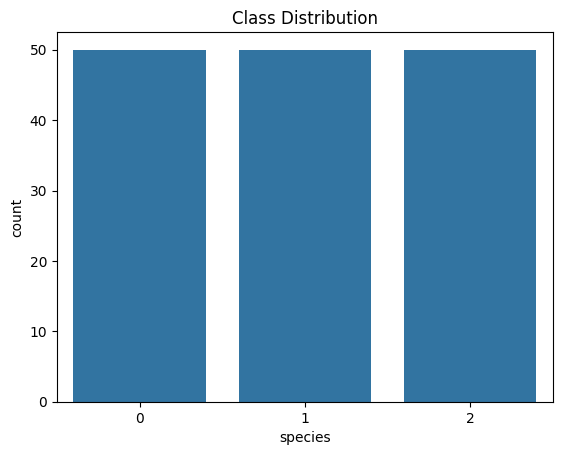

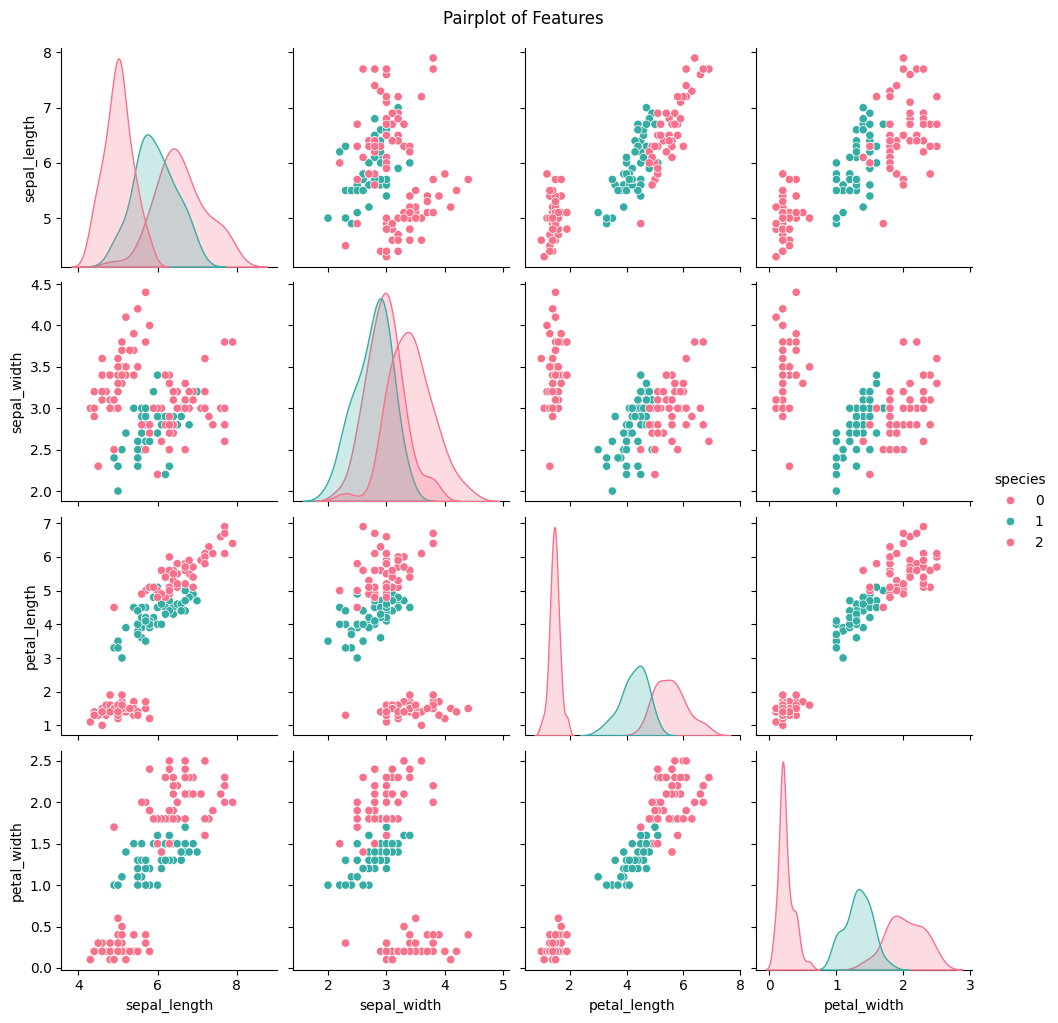

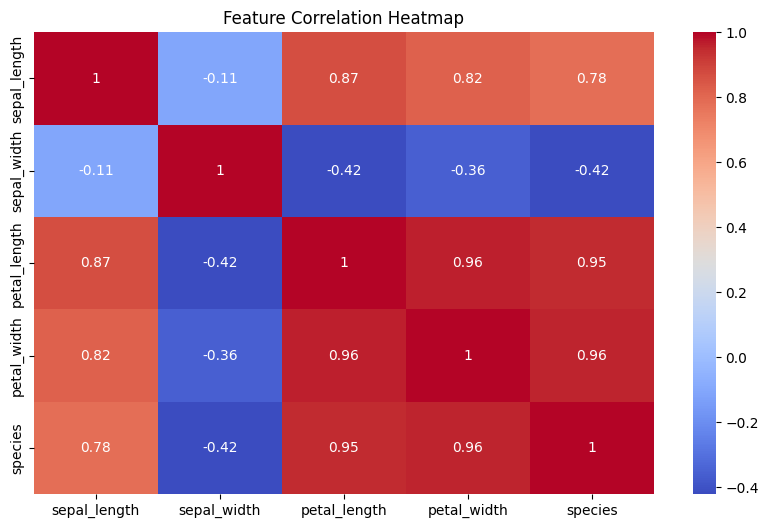

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import zipfile, io, glob, os

# Upload and extract ZIP file
uploaded = files.upload()
z = zipfile.ZipFile(io.BytesIO(uploaded[next(iter(uploaded))]), 'r')
z.extractall("iris_data")
f = glob.glob("iris_data/**/*.csv", recursive=True)[0]

# Load dataset and preview column names
df = pd.read_csv(f)
df.columns = df.columns.str.strip()
print("Detected columns:", df.columns.tolist())

# Detect the label/target column automatically
target_candidates = ['Species', 'species', 'class', 'Class', 'target']
target_col = next((col for col in df.columns if col in target_candidates), None)
if not target_col:
    raise ValueError("Target column (e.g., 'Species') not found in dataset.")

# Drop missing values (if any)
df.dropna(inplace=True)

# Encode the target column
df[target_col] = LabelEncoder().fit_transform(df[target_col])

# Data visualization
sns.countplot(data=df, x=target_col)
plt.title("Class Distribution")
plt.show()

sns.pairplot(df, hue=target_col, palette='husl')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Prepare features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
